In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
def null(df, feature, plot=False):
    t = df[feature].isna().mean() * 100
    print(f'% of null --> {t}')
    if plot:
        sns.countplot(dataset[feature], palette='cool')

In [101]:
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [103]:
dataset = train_data.copy() 
dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Looking for null values

In [104]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

#### features which contains null values

In [105]:
null_feat = [i for i in dataset.columns if dataset[i].isnull().sum() != 0]
null_feat

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [106]:
for i in null_feat:
    print(f"{i} --> {dataset[i].unique()}")

LotFrontage --> [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley --> [nan 'Grvl' 'Pave']
MasVnrType --> ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea --> [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430

In [107]:
dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean(), inplace=True)
dataset['LotFrontage'].isnull().sum()

0

In [108]:
dataset['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

% of null --> 93.76712328767123


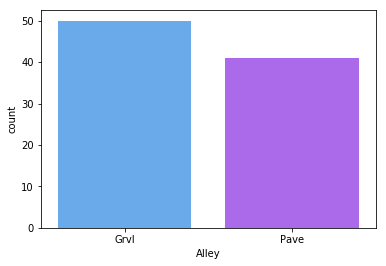

In [109]:
null(dataset, 'Alley', True)

In [110]:
dataset.drop('Alley', axis=1, inplace = True)

% of null --> 0.547945205479452


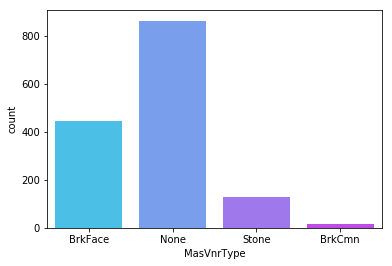

In [111]:
null(dataset, 'MasVnrType', True)

In [112]:
dataset['MasVnrType'].fillna('None', inplace=True)

In [113]:
dataset['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [114]:
null(dataset, 'MasVnrArea')

% of null --> 0.547945205479452


In [115]:
dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean(), inplace=True)

% of null --> 2.5342465753424657


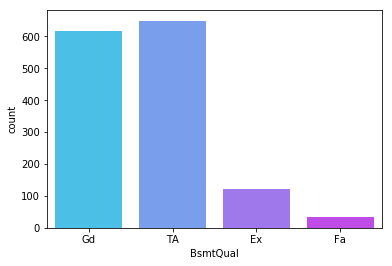

In [116]:
null(dataset, 'BsmtQual', True)

In [117]:
dataset['BsmtQual'].fillna('TA', inplace=True)

% of null --> 2.5342465753424657


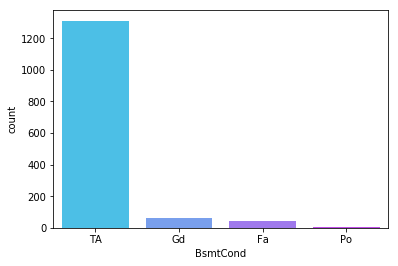

In [118]:
null(dataset, 'BsmtCond', True)

In [119]:
dataset['BsmtCond'].fillna('TA', inplace=True)

In [120]:
null_feat

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

% of null --> 2.6027397260273974


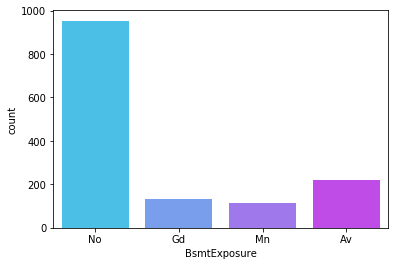

In [121]:
null(dataset, 'BsmtExposure', True)

In [122]:
dataset['BsmtExposure'].fillna('No', inplace=True)

% of null --> 2.5342465753424657


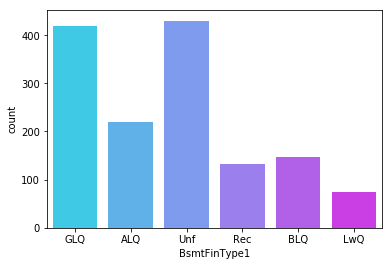

In [123]:
null(dataset, 'BsmtFinType1', True)

In [124]:
dataset['BsmtFinType1'].fillna('Unf', inplace=True)

% of null --> 2.6027397260273974


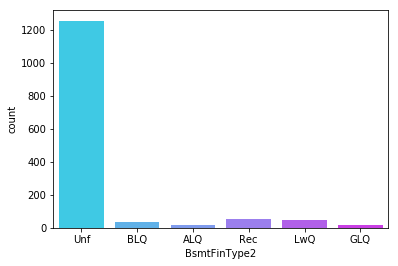

In [125]:
null(dataset, 'BsmtFinType2', True)

In [126]:
dataset['BsmtFinType2'].fillna('Unf', inplace=True)

% of null --> 0.0684931506849315


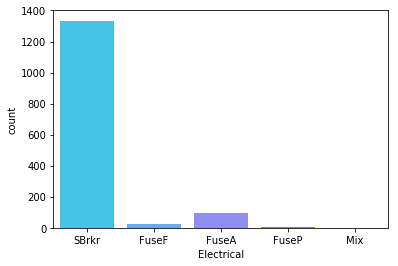

In [127]:
null(dataset, 'Electrical', True)

In [128]:
dataset['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [129]:
dataset['Electrical'].fillna('SBrkr', inplace=True)

% of null --> 47.26027397260274


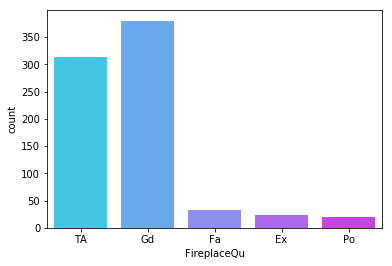

In [130]:
null(dataset, "FireplaceQu", True)

In [131]:
dataset['FireplaceQu'].fillna('None', inplace=True)

% of null --> 5.5479452054794525


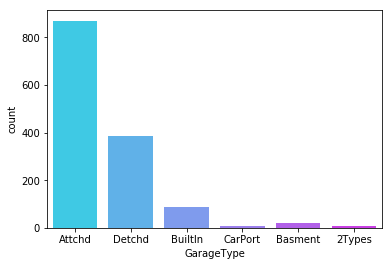

In [132]:
null(dataset, 'GarageType', True)

In [133]:
val = dataset['GarageType'].unique()[0]
dataset['GarageType'].fillna(val, inplace=True)

In [134]:
null(dataset, 'GarageYrBlt')

% of null --> 5.5479452054794525


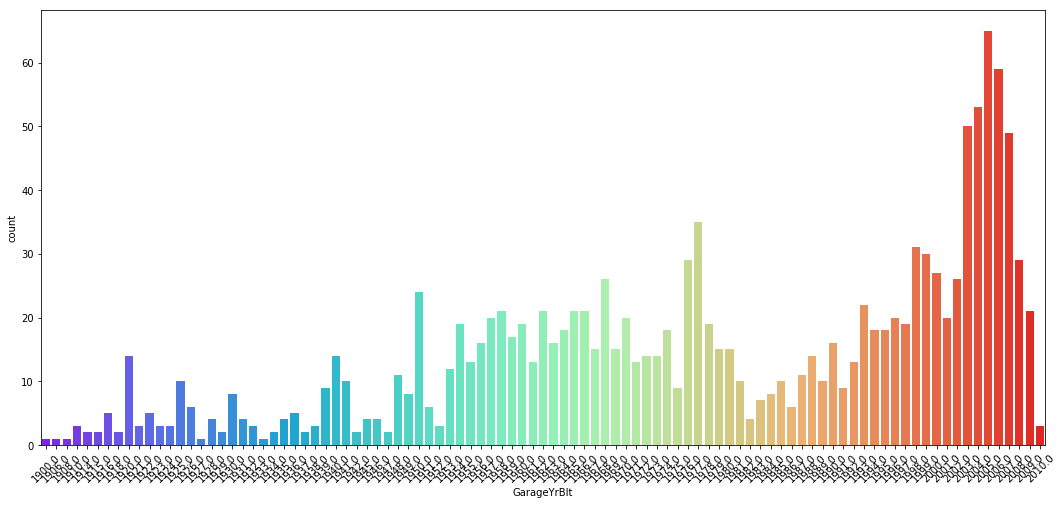

In [135]:
plt.figure(figsize=(18,8))
sns.countplot(dataset['GarageYrBlt'], palette='rainbow')
plt.xticks(rotation=45)
plt.show()

In [136]:
dataset['GarageYrBlt'].fillna('2005.0', inplace= True)

% of null --> 5.5479452054794525


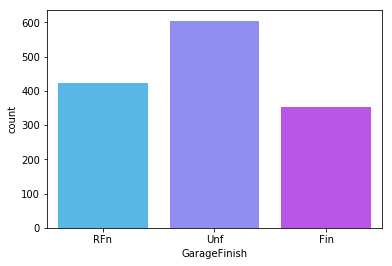

In [137]:
null(dataset, 'GarageFinish', True)

In [138]:
dataset['GarageFinish'].fillna(dataset['GarageFinish'].unique()[1], inplace=True)

% of null --> 5.5479452054794525


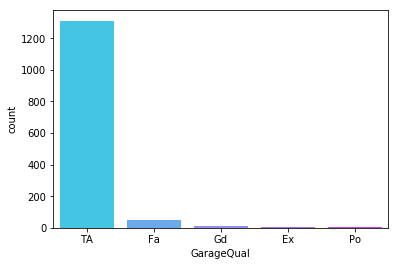

In [139]:
null(dataset, 'GarageQual', True)

In [140]:
dataset['GarageQual'].fillna(dataset['GarageQual'].unique()[0], inplace=True)

% of null --> 5.5479452054794525


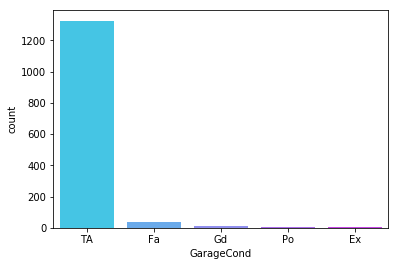

In [141]:
null(dataset, 'GarageCond', True)

In [142]:
dataset['GarageCond'].fillna(dataset['GarageCond'].unique()[0], inplace=True)

% of null --> 99.52054794520548


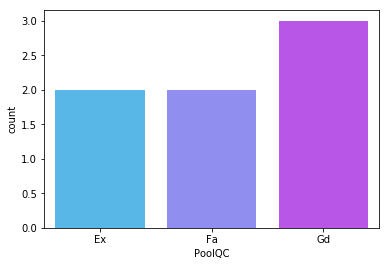

In [143]:
null(dataset, 'PoolQC', True)

In [144]:
dataset.drop('PoolQC', axis=1, inplace= True)

% of null --> 80.75342465753424


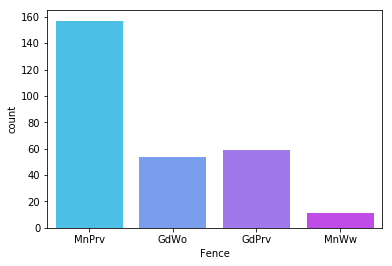

In [145]:
null(dataset, 'Fence', True)

In [146]:
dataset['Fence'].fillna('None', inplace=True)

% of null --> 96.30136986301369


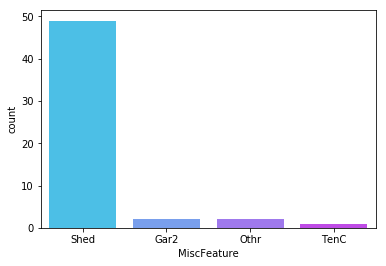

In [147]:
null(dataset, 'MiscFeature', True)

In [148]:
dataset.drop('MiscFeature', axis=1, inplace=True)

In [149]:
dataset.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,None,0,5,2007,WD,Normal,181500


In [150]:
dataset.shape

(1460, 78)

In [151]:
dropped_col = list(set(train_data.columns) - set(dataset.columns))
dropped_col

['Alley', 'MiscFeature', 'PoolQC']

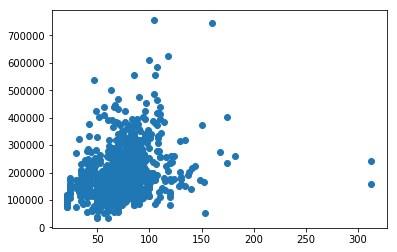

In [152]:
plt.scatter(dataset['LotFrontage'], dataset['SalePrice'])

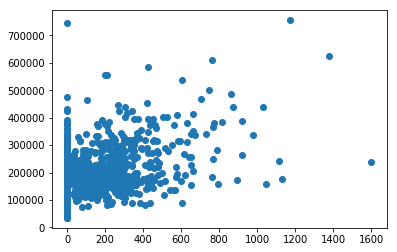

In [153]:
plt.scatter(dataset['MasVnrArea'], dataset['SalePrice'])

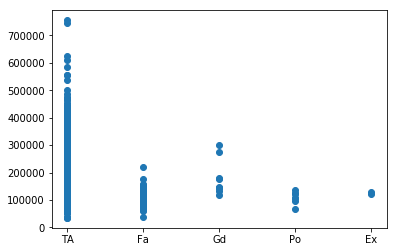

In [154]:
plt.scatter(dataset['GarageCond'], dataset['SalePrice'])

In [155]:
dataset['GarageCond'].value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [156]:
num_feat = [i for i in dataset.columns if dataset[i].dtypes != 'O']
len(num_feat)

37

In [157]:
dataset[set(dataset.columns) - set(num_feat)].head(2)

,BsmtFinType2,HeatingQC,GarageType,Fence,Exterior2nd,Exterior1st,GarageCond,Condition2,GarageFinish,BldgType,...,KitchenQual,Neighborhood,SaleCondition,BsmtQual,MSZoning,CentralAir,RoofStyle,ExterQual,ExterCond,Functional
0,Unf,Ex,Attchd,None,VinylSd,VinylSd,TA,Norm,RFn,1Fam,...,Gd,CollgCr,Normal,Gd,RL,Y,Gable,Gd,TA,Typ
1,Unf,Ex,Attchd,None,MetalSd,MetalSd,TA,Norm,RFn,1Fam,...,TA,Veenker,Normal,Gd,RL,Y,Gable,TA,TA,Typ


In [158]:
dataset[set(dataset.columns) - set(num_feat)].dtypes

BsmtFinType2     object
HeatingQC        object
GarageType       object
Fence            object
Exterior2nd      object
Exterior1st      object
GarageCond       object
Condition2       object
GarageFinish     object
BldgType         object
Electrical       object
PavedDrive       object
BsmtExposure     object
RoofMatl         object
Street           object
BsmtFinType1     object
LotShape         object
Heating          object
BsmtCond         object
FireplaceQu      object
GarageQual       object
LandContour      object
HouseStyle       object
SaleType         object
GarageYrBlt      object
LandSlope        object
Utilities        object
LotConfig        object
MasVnrType       object
Foundation       object
Condition1       object
KitchenQual      object
Neighborhood     object
SaleCondition    object
BsmtQual         object
MSZoning         object
CentralAir       object
RoofStyle        object
ExterQual        object
ExterCond        object
Functional       object
dtype: object

In [159]:
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(float)
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(int)

In [160]:
cat_feat = dataset[set(dataset.columns) - set(num_feat)]

In [161]:
dataset[num_feat].head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


In [162]:
float_feat = [i for i in num_feat if dataset[i].dtypes == 'float']
float_feat

['LotFrontage', 'MasVnrArea']

In [163]:
for i in cat_feat:
    print(i)
    print(dataset[i].unique())
    print("------------------------------------")

BsmtFinType2
['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ']
------------------------------------
HeatingQC
['Ex' 'Gd' 'TA' 'Fa' 'Po']
------------------------------------
GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Basment' '2Types']
------------------------------------
Fence
['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
------------------------------------
Exterior2nd
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
------------------------------------
Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
------------------------------------
GarageCond
['TA' 'Fa' 'Gd' 'Po' 'Ex']
------------------------------------
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
------------------------------------
GarageFinish
['RFn' 'Unf' 'Fin']
--------------------------

In [164]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in cat_feat:
    dataset[i] = label.fit_transform(dataset[i])

In [165]:
dataset.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,4,0,5,2007,8,4,181500


In [166]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
                  ...   
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int32
TotRmsAbvGrd       int64
Functional         int32
Fireplaces         int64
FireplaceQu        int32


In [167]:
dataset.to_csv('output.csv',header=True, index=False)

In [168]:
final_dataset = pd.read_csv('output.csv')
final_dataset.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,4,0,5,2007,8,4,181500


In [169]:
X_train = final_dataset.drop('SalePrice', axis=1)
y_train = final_dataset['SalePrice']

In [170]:
columns = X_train.columns
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled = scale.fit(X_train)
X_train_scaled = pd.DataFrame(scale.transform(X_train), columns=columns)

C:\Users\Kaushal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kaushal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [171]:
X_train_scaled.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730865,0.073375,-0.045532,-0.229372,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,...,-0.359325,-0.116339,-0.270208,-0.068692,0.457447,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-1.728492,-0.872563,-0.045532,0.451936,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,...,-0.359325,-0.116339,-0.270208,-0.068692,0.457447,-0.087688,-0.489110,-0.614439,0.313867,0.208502


In [172]:
test_data = pd.read_csv('test.csv')
test_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [173]:
test_data.drop(dropped_col, axis=1, inplace=True)

In [174]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,MnPrv,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,NaN,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,MnPrv,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,NaN,0,1,2010,WD,Normal


In [175]:
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(), inplace=True)

test_data['MasVnrType'].fillna('None', inplace=True)

test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean(), inplace=True)

test_data['BsmtQual'].fillna('TA', inplace=True)

test_data['BsmtCond'].fillna('TA', inplace=True)

test_data['BsmtExposure'].fillna('No', inplace=True)

test_data['BsmtFinType1'].fillna('Unf', inplace=True)

test_data['BsmtFinType2'].fillna('Unf', inplace=True)

test_data['Electrical'].fillna('SBrkr', inplace=True)

test_data['FireplaceQu'].fillna('None', inplace=True)

val = test_data['GarageType'].unique()[0]
test_data['GarageType'].fillna(val, inplace=True)

test_data['GarageYrBlt'].fillna('2005.0', inplace= True)

test_data['GarageFinish'].fillna(test_data['GarageFinish'].unique()[1], inplace=True)

test_data['GarageQual'].fillna(test_data['GarageQual'].unique()[0], inplace=True)

test_data['GarageCond'].fillna(test_data['GarageCond'].unique()[0], inplace=True)

test_data['Fence'].fillna('None', inplace=True)

In [81]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [176]:
test_null = [i for i in test_data.columns if test_data[i].isnull().sum() > 0]
test_null

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [177]:
test_data[test_null].dtypes

MSZoning         object
Utilities        object
Exterior1st      object
Exterior2nd      object
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
GarageCars      float64
GarageArea      float64
SaleType         object
dtype: object

In [178]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Functional       2
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       1
GarageArea       1
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [179]:
test_data.shape

(1459, 77)